In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron2\datasets\titanic'

In [3]:
# set pandas display options to show full table
def set_pandas_display_options() -> None:
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [4]:
try:
    train = pd.read_csv(os.path.join(f,'train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join(f,'test.csv'), index_col='PassengerId')
except:
    train = pd.read_csv(os.path.join('data','train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join('data','test.csv'), index_col='PassengerId')
print(train.shape,test.shape)

explore = train.copy()

(891, 11) (418, 10)


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Data Exploration

In [5]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Cols having missing values: *Age, cabin, and Embarked***

<br>

In [6]:
# check if classes are evenly distributed
explore.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# investigate age missing rows
train[(train.Age.isna()) & (train.Pclass==3)].head(10)

Survived  Pclass                           Name     Sex  Age  \
PassengerId                                                                 
6                   0       3               Moran, Mr. James    male  NaN   
20                  1       3        Masselmani, Mrs. Fatima  female  NaN   
27                  0       3        Emir, Mr. Farred Chehab    male  NaN   
29                  1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
30                  0       3            Todoroff, Mr. Lalio    male  NaN   
33                  1       3       Glynn, Miss. Mary Agatha  female  NaN   
37                  1       3               Mamee, Mr. Hanna    male  NaN   
43                  0       3            Kraeff, Mr. Theodor    male  NaN   
46                  0       3       Rogers, Mr. William John    male  NaN   
47                  0       3              Lennon, Mr. Denis    male  NaN   

             SibSp  Parch           Ticket     Fare Cabin Embarked  
PassengerId                                                         
6                0      0           330877   8.4583   NaN        Q  
20               0      0             2649   7.2250   NaN        C  
27               0      0             2631   7.2250   NaN        C  
29               0      0           330959   7.8792   NaN        Q  
30               0      0           349216   7.8958   NaN        S  
33               0      0           335677   7.7500   NaN        Q  
37               0      0             2677   7.2292   NaN        C  
43               0      0           349253   7.8958   NaN        C  
46               0      0  S.C./A.4. 23567   8.0500   NaN        S  
47               1      0           370371  15.5000   NaN        Q

**Conclusion: no evidence of missing age due to child-fare**

<br>

In [8]:
explore.pivot_table('Name',columns='Sex',index='Survived',aggfunc='count')

Sex       female  male
Survived              
0             81   468
1            233   109

In [9]:
explore.pivot_table('Name',columns='Embarked',index='Survived',aggfunc='count')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

In [10]:
# explore.Ticket.value_counts()

In [11]:
# explore.Ticket.astype(str)

In [12]:
# explore[explore.Ticket.str.len()<7].sort_values(by='Ticket')

In [13]:
explore.Fare = explore.Fare.round(-1)
explore.pivot_table('Name',columns='Fare',index='Survived',aggfunc='count')

Fare      0.0    10.0   20.0   30.0   40.0   50.0   60.0   70.0   80.0   \
Survived                                                                  
0          16.0  327.0   54.0   76.0   16.0   17.0    6.0   14.0    8.0   
1           1.0  113.0   46.0   59.0   12.0   13.0   19.0    5.0   23.0   

Fare      90.0   110.0  120.0  130.0  140.0  150.0  160.0  210.0  220.0  \
Survived                                                                  
0           1.0    4.0    NaN    NaN    1.0    3.0    NaN    1.0    1.0   
1          12.0    7.0    4.0    4.0    2.0    6.0    2.0    3.0    NaN   

Fare      230.0  250.0  260.0  510.0  
Survived                              
0           1.0    1.0    2.0    NaN  
1           3.0    1.0    4.0    3.0

In [14]:
explore.pivot_table('Age',index='Survived',aggfunc='mean')

Age
Survived           
0         30.626179
1         28.343690

In [15]:
explore.describe()

Survived      Pclass         Age       SibSp       Parch       Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.00000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   33.01908
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.25032
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.00000
25%      0.000000    2.000000   20.125000    0.000000    0.000000   10.00000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   10.00000
75%      1.000000    3.000000   38.000000    1.000000    0.000000   30.00000
max      1.000000    3.000000   80.000000    8.000000    6.000000  510.00000

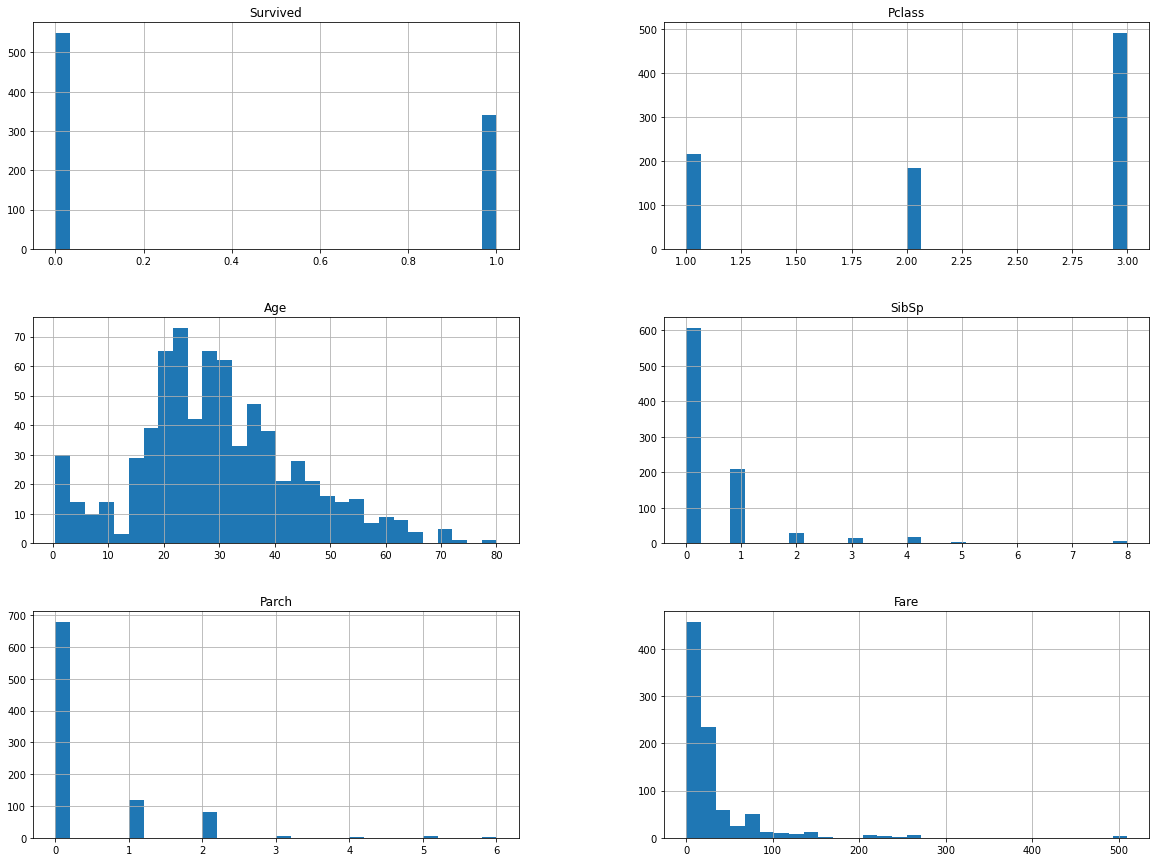

In [16]:
explore.hist(bins=30,figsize=(20,15))
plt.show()

## 2. Feature Engineering 

>**1. process name, sex, and age**

In [17]:
# examine names
noble = ['Duke.','Duchess.','Marquess.','Marchioness.','Lord.','Lady.','Earl.','Countess.','Honourable.',
    'Viscount','Viscountess','Baron','Baroness','Knight.']
Ms = ['Mrs.', 'Miss.']

explore['Noble'] = explore['Name'].str.contains('|'.join(noble))

In [18]:
explore.pivot_table('Name',columns='Noble',index='Survived',aggfunc='count')

Noble     False  True 
Survived              
0           548      1
1           340      2

**Noble not worth it**

In [94]:
# combine sex and age features
bins = [0,16,60,120]
group_names = ['Young','Adult','Senior']
explore.loc[:,'Age_Group'] = pd.cut(explore.Age, bins, labels=group_names)
explore.loc[:,'Sex-Age'] = explore['Sex'] + explore['Age_Group'].astype(str)

> **2. Mean encoding**

> 2.1 Cross Validation Regularizatoin

In [95]:
explore.isna().sum()

Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Noble                    0
Embarked_me              0
Cabin1                 687
Cabin1_me                0
Sex_me                   0
Embarked_me_cv           0
Cabin1_me_cv             0
Sex_me_cv                0
Embarked_me_expmean      0
Cabin1_me_expmean        0
Sex_me_expmean           0
Age_Group              177
Sex-Age                  0
dtype: int64

**only `Embarked` is fit for mean encoding**

In [20]:
explore['Embarked_me']=explore.groupby('Embarked')['Survived'].transform('mean')
explore['Embarked_me'].fillna(explore['Survived'].mean(), inplace=True)

explore['Cabin1'] = explore.Cabin.str[0]
explore['Cabin1_me']=explore.groupby('Cabin1')['Survived'].transform('mean')
explore['Cabin1_me'].fillna(explore['Survived'].mean(), inplace=True)

explore['Sex_me']=explore.groupby('Sex')['Survived'].transform('mean')
explore.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket  Fare Cabin Embarked  Noble  \
PassengerId                                                                     
1            22.0      1      0         A/5 21171  10.0   NaN        S  False   
2            38.0      1      0          PC 17599  70.0   C85        C  False   
3            26.0      0      0  STON/O2. 3101282  10.0   NaN        S  False   
4            35.0      1      0            113803  50.0  C123        S  False   
5            35.0      0      0            373450  10.0   NaN        S  False   

             Embarked_me Cabin1  Cabin1_me    Sex_me  
PassengerId                                           
1               0.336957    NaN   0.383838  0.188908  
2               0.553571      C   0.593220  0.742038  
3               0.336957    NaN   0.383838  0.742038  
4               0.336957      C   0.593220  0.742038  
5               0.336957    NaN   0.383838  0.188908

In [21]:
print('CORR: ', np.corrcoef(explore['Survived'].values, explore['Embarked_me'].values)[0][1].round(2))
explore['Embarked_me'].unique()

CORR:  0.17


array([0.33695652, 0.55357143, 0.38961039, 0.38383838])

In [22]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Cabin1_me'].values)[0][1].round(2))
explore['Cabin1_me'].unique()

CORR: 0.33


array([0.38383838, 0.59322034, 0.75      , 0.5       , 0.75757576,
       0.46666667, 0.74468085, 0.61538462, 0.        ])

In [23]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Sex_me'].values)[0][1].round(2))
explore['Sex_me'].unique()

CORR: 0.54


array([0.18890815, 0.74203822])

> **2.2 Regularize using KFold**

In [96]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=12, shuffle=True)

me_feats = ['Embarked','Cabin1','Sex','Sex-Age']

for col in me_feats:
    explore[col+'_me_cv'] = 0
    for train_index, val_index in kf.split(explore): # use cross-val index to reduce encoding results' correlation with target
        train, val = explore.iloc[train_index], explore.iloc[val_index]
        mean = val[col].map(train.groupby(col)['Survived'].mean())
        explore.iloc[val_index, explore.columns.get_loc(col+'_me_cv')] = mean
        explore[col+'_me_cv'].fillna(explore['Survived'].mean(), inplace=True)

In [97]:
print('CORR: ', np.corrcoef(explore['Survived'].values, explore['Embarked_me_cv'].values)[0][1].round(2))
explore['Embarked_me_cv'].unique()

CORR:  0.13


array([0.36170213, 0.52671756, 0.32156863, 0.32239382, 0.33846154,
       0.45762712, 0.34050881, 0.40625   , 0.54545455, 0.39344262,
       0.56934307, 0.33333333, 0.53787879, 0.58571429, 0.38383838,
       0.36065574])

In [98]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Cabin1_me_cv'].values)[0][1].round(2))
explore['Cabin1_me_cv'].unique()

CORR: 0.3


array([0.38383838, 0.55555556, 0.58536585, 0.80769231, 0.5       ,
       0.77777778, 0.42857143, 0.73684211, 0.7027027 , 0.60869565,
       0.78378378, 0.66666667, 0.76      , 0.46153846, 0.7826087 ,
       0.62      , 0.74358974, 0.6       , 0.54545455, 0.75675676,
       0.70833333, 0.72413793, 0.75      , 0.73333333, 0.33333333,
       0.58333333, 0.78571429])

In [99]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Sex_me_cv'].values)[0][1].round(2))
explore['Sex_me_cv'].unique()

CORR: 0.54


array([0.18763797, 0.76153846, 0.72289157, 0.74380165, 0.19256018,
       0.74297189, 0.19396552, 0.73828125, 0.17659574])

*conlusion: CV helps reduce on correlation slightly, but more so for weak-correlated features than strong one*

> **2.3 Regularize using Expanding mean**

In [30]:
for feature in me_feats:
    cum_sum = explore.groupby(feature)['Survived'].cumsum() - explore['Survived']
    cum_count = explore.groupby(feature).cumcount()

    explore[feature + '_me_expmean'] = cum_sum / cum_count
    explore[feature + '_me_expmean'].fillna(explore['Survived'].mean(), inplace=True)

In [31]:
for feat in me_feats:
    # fill the first value with median
    explore[feat+'_me_expmean'].replace([np.inf,-np.inf], explore[feat+'_me_expmean'].median(), inplace=True)
    # calculate the correlation
    print('CORR of ', feat, ' with target is: ', np.corrcoef(explore['Survived'].values, explore[feat+'_me_expmean'].values)[0][1].round(2))

CORR of  Embarked  with target is:  0.06
CORR of  Cabin1  with target is:  0.27
CORR of  Sex  with target is:  0.54


*conlusion: Expanding Mean is more effective than CV on correlation reduction*

> ##### mean Encode for testing

In [32]:
# Create mean encoding for testing set using CV
from sklearn import base

class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,orig_cols,enc_cols):
        
        self.train = train
        self.orig_cols = orig_cols
        self.enc_cols = enc_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(isinstance(self.orig_cols,list))
        assert(isinstance(self.enc_cols,list))
        enc_cols_lis = []
        for orig_col, enc_col in zip(self.orig_cols, self.enc_cols):
            mean =  self.train.groupby(orig_col)[enc_col].mean()
            X[enc_col] = X[orig_col].map(mean)
        enc_cols_lis.append(X)
        return pd.concat(enc_cols_lis,axis=1)

In [33]:
explore.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket  Fare Cabin Embarked  Noble  \
PassengerId                                                                     
1            22.0      1      0         A/5 21171  10.0   NaN        S  False   
2            38.0      1      0          PC 17599  70.0   C85        C  False   
3            26.0      0      0  STON/O2. 3101282  10.0   NaN        S  False   
4            35.0      1      0            113803  50.0  C123        S  False   
5            35.0      0      0            373450  10.0   NaN        S  False   

             Embarked_me Cabin1  Cabin1_me    Sex_me  Embarked_me_cv  \
PassengerId                                                            
1               0.336957    NaN   0.383838  0.188908        0.361702   
2               0.553571      C   0.593220  0.742038        0.526718   
3               0.336957    NaN   0.383838  0.742038        0.321569   
4               0.336957      C   0.593220  0.742038        0.322394   
5               0.336957    NaN   0.383838  0.188908        0.338462   

             Cabin1_me_cv  Sex_me_cv  Embarked_me_expmean  Cabin1_me_expmean  \
PassengerId                                                                    
1                0.383838   0.187638             0.383838          -0.002793   
2                0.555556   0.761538             0.383838           0.383838   
3                0.383838   0.722892             0.000000          -2.000000   
4                0.585366   0.743802             0.500000           1.000000   
5                0.383838   0.192560             0.666667          -0.500000   

             Sex_me_expmean  
PassengerId                  
1                  0.383838  
2                  0.383838  
3                  1.000000  
4                  1.000000  
5                  0.000000

In [34]:
test_me_feats = [feat + '_me_cv' for feat in me_feats]

test_enc_model = KFoldTargetEncoderTest(explore,me_feats,test_me_feats)
test['Cabin1'] = test.Cabin.str[0]
test_enc_feats = test_enc_model.fit_transform(test)

> **3. KNN encoding**

In [35]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors # Unsupervised learner for implementing neighbor searches

class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list # list of K_neighbors candidates, e.g.: [2,3,4,5,...]
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many target classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every instance of X
        '''
        test_feats = []
        
        if self.n_jobs == 1:
            for i in range(X.shape[0]):
                test_feats.append(self.get_features_for_one(X[i:i+1]))
                
        else:
            from multiprocessing import Pool
            import os
            if __name__ == '__main__':
                with Pool(processes=self.n_jobs) as pool:
                    # evaluate "f(X)" asynchronously
                    res = pool.apply_async(self.get_features_for_one, X.shape[0])      # runs in *only* one process
                    print(res.get(timeout=1))             # prints "400"

                    # evaluate "os.getpid()" asynchronously
                    res = pool.apply_async(os.getpid, ()) # runs in *only* one process
                    print(res.get(timeout=1))             # prints the PID of that process

                    # launching multiple evaluations asynchronously *may* use more processes
                    multiple_results = [pool.apply_async(os.getpid, ()) for i in range(self.n_jobs)]
                    print([res.get(timeout=1) for res in multiple_results])

                    # make a single worker sleep for 10 secs
                    res = pool.apply_async(time.sleep, (10,))
                    try:
                        print(res.get(timeout=1))
                        results = [pool.apply(self.get_features_for_one, args=(X[i:i+1],)) for i in range(X.shape[0])]
                        test_feats.append(results)
                    except TimeoutError:
                        print("We lacked patience and got a multiprocessing.TimeoutError")
                    
            
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        
        # import pdb; pdb.set_trace()
        neighs_y = np.array(self.y_train)[neighs]
            
        
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        
        
        ''' 
            1. Fraction of instances of every class.
               It is basically a KNNСlassifiers predictions.
        '''
        for k in self.k_list:
            # YOUR CODE GOES HERE
            labels = np.bincount(neighs_y[:k], minlength=self.n_classes)
            feats = labels/labels.sum()
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
        '''
        
        feats =  np.where(np.unique(neighs_y).size==1, neighs_y.size, np.argmin(np.array(neighs_y[:-1]==neighs_y[1:])) + 1)
 
        
#         assert len(feats) == 1
        assert feats.size == 1
        return_list += [feats]
        
        '''
            3. Minimum distance to objects of each class
               Find the first instance of a class and take its distance as features.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0]
            feats.append(dis)
        
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0] / (neighs_dist[0] + self.eps)
            feats.append(dis)
    
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor
               
               feat_51, feat_52 are answers to 5.1. and 5.2.
               should be scalars
        '''
        for k in self.k_list:
            
            feat_51 = neighs_dist[k-1] # YOUR CODE GOES HERE
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps) # YOUR CODE GOES HERE
            
            return_list += [[feat_51, feat_52]]
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
               For each class select the neighbors of that class among K nearest neighbors 
               and compute the average distance to those objects
                   
               If there are no objects of a certain class among K neighbors, set mean distance to 999
        '''
        for k in self.k_list:
            
            # YOUR CODE GOES IN HERE
            mean_dist = np.bincount(neighs_y[:k], weights=neighs_dist[:k], minlength=self.n_classes) \
                    / (np.bincount(neighs_y[:k], minlength=self.n_classes) + self.eps)
            feats = np.where(mean_dist==0, 999, mean_dist)
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        # merge
        knn_feats = np.hstack(return_list)

        return knn_feats

In [36]:
X, y = explore.drop('Survived',axis=1), explore['Survived']
knn_cols = ['SibSp','Parch','Fare']
X_nnf = X[knn_cols]

In [37]:
X_nnf.isna().any()

SibSp    False
Parch    False
Fare     False
dtype: bool

In [38]:
# Create instance of our KNN feature extractor
NNF = NearestNeighborsFeats(n_jobs=1, k_list=[3,4,5], metric='minkowski')

# Fit on train set
NNF.fit(X_nnf, y)

# Get features for test
knn_feats = NNF.predict(X_nnf)
Knn_feat_names = list('Knn_'+ str(i) for i in list(range(knn_feats.shape[1])))

> get the KNN features for test

In [39]:
X_test_nnf = test[knn_cols]
X_test_nnf.isna().any()

SibSp    False
Parch    False
Fare      True
dtype: bool

In [40]:
X_test_nnf = X_test_nnf.fillna({'Fare':explore.Fare.mean()})
X_test_nnf.isna().any()

SibSp    False
Parch    False
Fare     False
dtype: bool

In [41]:
test_knn_feats = NNF.predict(X_test_nnf)

In [42]:
test_knn_feats.shape

(418, 23)

> 3. select features for training

In [43]:
explore.head(1)

Survived  Pclass                     Name   Sex   Age  SibSp  \
PassengerId                                                                 
1                   0       3  Braund, Mr. Owen Harris  male  22.0      1   

             Parch     Ticket  Fare Cabin Embarked  Noble  Embarked_me Cabin1  \
PassengerId                                                                     
1                0  A/5 21171  10.0   NaN        S  False     0.336957    NaN   

             Cabin1_me    Sex_me  Embarked_me_cv  Cabin1_me_cv  Sex_me_cv  \
PassengerId                                                                 
1             0.383838  0.188908        0.361702      0.383838   0.187638   

             Embarked_me_expmean  Cabin1_me_expmean  Sex_me_expmean  
PassengerId                                                          
1                       0.383838          -0.002793        0.383838

In [84]:
X_cols_keep = ['Pclass','Age','SibSp','Parch','Fare','Embarked_me_cv','Cabin1_me_cv','Sex_me_cv']
X,y = explore[X_cols_keep], explore['Survived']

X_MeanEnc_KnnFeats = np.c_[X.values,knn_feats]
X.shape, X_MeanEnc_KnnFeats.shape

((891, 8), (891, 31))

> 4. get the same encoding features for testing

In [45]:
X_test = test[X_cols_keep]
X_test_MeanEnc_KnnFeats = np.c_[X_test.values, test_knn_feats]
X_test.shape, X_test_MeanEnc_KnnFeats.shape

((418, 8), (418, 31))

## 3. Training with GB Tree

In [46]:
import xgboost
xgb_clf = xgboost.XGBClassifier()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_MeanEnc_KnnFeats, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)

from sklearn.metrics import accuracy_score
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.189944
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.178771
[2]	validation_0-error:0.156425
[3]	validation_0-error:0.178771
[4]	validation_0-error:0.156425
[5]	validation_0-error:0.156425
[6]	validation_0-error:0.156425
Stopping. Best iteration:
[2]	validation_0-error:0.156425



0.8436

In [47]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
            'max_depth': [3,4,5],
            'learning_rate':stats.reciprocal(0.005, 0.5),
            'n_estimators':stats.randint(20, 230),
            'gamma':[0, 0.5 ,1]
         }

random_tree = RandomizedSearchCV(xgb_clf, n_jobs=-1, param_distributions=xgb_params, 
                                 n_iter=300, cv=3, random_state=10)

random_tree.fit(X_MeanEnc_KnnFeats, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.853


{'gamma': 0.5,
 'learning_rate': 0.41838041132497794,
 'max_depth': 4,
 'n_estimators': 215}

In [48]:
random_tree.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
y_val_hat = random_tree.best_estimator_.predict(X_val)
accuracy_score(y_val_hat, y_val).round(4)

[0]	validation_0-error:0.156425
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.150838
[2]	validation_0-error:0.139665
[3]	validation_0-error:0.167598
[4]	validation_0-error:0.145251
[5]	validation_0-error:0.145251
[6]	validation_0-error:0.134078
[7]	validation_0-error:0.145251
[8]	validation_0-error:0.128492
[9]	validation_0-error:0.134078
[10]	validation_0-error:0.134078
[11]	validation_0-error:0.145251
[12]	validation_0-error:0.134078
Stopping. Best iteration:
[8]	validation_0-error:0.128492



0.8715

## 4. Examine Errors

#### 4.1 Examined mislabelled val data

In [49]:
# false positive
FP_idx = y_val[(y_val_hat == 1)&(y_val==0)].index
FP = explore.loc[FP_idx]
# false negative
FN_idx = y_val[(y_val_hat == 0)&(y_val==1)].index
FN = explore.loc[FN_idx]

In [50]:
FP.sort_values(['Sex','Pclass'])

Survived  Pclass                                        Name  \
PassengerId                                                                 
313                 0       2       Lahtinen, Mrs. William (Anna Sylfven)   
206                 0       3                  Strom, Miss. Telma Matilda   
565                 0       3              Meanwell, Miss. (Marion Ogden)   
101                 0       3                     Petranec, Miss. Matilda   
252                 0       3  Strom, Mrs. Wilhelm (Elna Matilda Persson)   
853                 0       3                     Boulos, Miss. Nourelain   
255                 0       3    Rosblom, Mrs. Viktor (Helena Wilhelmina)   
170                 0       3                               Ling, Mr. Lee   
851                 0       3     Andersson, Master. Sigvard Harald Elias   

                Sex   Age  SibSp  Parch             Ticket  Fare Cabin  \
PassengerId                                                              
313          female  26.0      1      1             250651  30.0   NaN   
206          female   2.0      0      1             347054  10.0    G6   
565          female   NaN      0      0  SOTON/O.Q. 392087  10.0   NaN   
101          female  28.0      0      0             349245  10.0   NaN   
252          female  29.0      1      1             347054  10.0    G6   
853          female   9.0      1      1               2678  20.0   NaN   
255          female  41.0      0      2             370129  20.0   NaN   
170            male  28.0      0      0               1601  60.0   NaN   
851            male   4.0      4      2             347082  30.0   NaN   

            Embarked  Noble  Embarked_me Cabin1  Cabin1_me    Sex_me  \
PassengerId                                                            
313                S  False     0.336957    NaN   0.383838  0.742038   
206                S  False     0.336957      G   0.500000  0.742038   
565                S  False     0.336957    NaN   0.383838  0.742038   
101                S  False     0.336957    NaN   0.383838  0.742038   
252                S  False     0.336957      G   0.500000  0.742038   
853                C  False     0.553571    NaN   0.383838  0.742038   
255                S  False     0.336957    NaN   0.383838  0.742038   
170                S  False     0.336957    NaN   0.383838  0.188908   
851                S  False     0.336957    NaN   0.383838  0.188908   

             Embarked_me_cv  Cabin1_me_cv  Sex_me_cv  Embarked_me_expmean  \
PassengerId                                                                 
313                0.340509      0.383838   0.742972             0.324201   
206                0.361702      0.666667   0.761538             0.306122   
565                0.361702      0.383838   0.761538             0.344913   
101                0.321569      0.383838   0.722892             0.347826   
252                0.322394      0.500000   0.743802             0.300546   
853                0.526718      0.383838   0.761538             0.543750   
255                0.340509      0.383838   0.742972             0.295699   
170                0.361702      0.383838   0.187638             0.303279   
851                0.340509      0.383838   0.193966             0.337684   

             Cabin1_me_expmean  Sex_me_expmean  
PassengerId                                     
313                  -0.004115        0.728070  
206                   1.000000        0.718310  
565                  -0.002294        0.752381  
101                  -0.012500        0.794872  
252                   0.500000        0.709302  
853                  -0.001522        0.745763  
255                  -0.004902        0.701149  
170                  -0.007299        0.137615  
851                  -0.001527        0.190991

*All but one errors are 3rd class, the model might be underestimating the PClass feature <br/>* 
*why Mr Ling Lee is an error? young male in 3rd class?*

In [51]:
import shap
explainer = shap.TreeExplainer(random_tree.best_estimator_, X_train)
shap_values = explainer.shap_values(X_val)

# Look into Mr. Lee Ling ID_170
Lee_loc = y_val.index.get_loc(170)
shap.initjs() #initialize javascript in cell
shap.force_plot(explainer.expected_value, shap_values[Lee_loc], X_val[Lee_loc])

In [52]:
# focus on non-knn features only
X_val_df = pd.DataFrame(X_val[:,:8], columns=X_cols_keep) # transform first 8 columns to dataframe
shap.force_plot(explainer.expected_value, shap_values[Lee_loc,:8], X_val_df.iloc[Lee_loc])

*Pclass, Sex, and Embarked all correctly pushing Mr. Lee to direction 0 <br/>but the knn features overpowered non-knn features and pushed Mr. Lee to 1 <br/> <br/>*

*Knn_features caused Mr. Lee to be labeled positive*

In [53]:
# false negative
FN.sort_values(['Sex','Pclass'])

Survived  Pclass                           Name     Sex   Age  \
PassengerId                                                                  
45                  1       3  Devaney, Miss. Margaret Delia  female  19.0   
856                 1       3     Aks, Mrs. Sam (Leah Rosen)  female  18.0   
448                 1       1    Seward, Mr. Frederic Kimber    male  34.0   
461                 1       1            Anderson, Mr. Harry    male  48.0   
551                 1       1    Thayer, Mr. John Borland Jr    male  17.0   
608                 1       1    Daniel, Mr. Robert Williams    male  27.0   
289                 1       2           Hosono, Mr. Masabumi    male  42.0   
571                 1       2             Harris, Mr. George    male  62.0   
227                 1       2      Mellors, Mr. William John    male  19.0   
548                 1       2     Padro y Manent, Mr. Julian    male   NaN   
401                 1       3             Niskanen, Mr. Juha    male  39.0   
126                 1       3   Nicola-Yarred, Master. Elias    male  12.0   
805                 1       3        Hedman, Mr. Oskar Arvid    male  27.0   
268                 1       3       Persson, Mr. Ernst Ulrik    male  25.0   

             SibSp  Parch             Ticket   Fare Cabin Embarked  Noble  \
PassengerId                                                                 
45               0      0             330958   10.0   NaN        Q  False   
856              0      1             392091   10.0   NaN        S  False   
448              0      0             113794   30.0   NaN        S  False   
461              0      0              19952   30.0   E12        S  False   
551              0      2              17421  110.0   C70        C  False   
608              0      0             113804   30.0   NaN        S  False   
289              0      0             237798   10.0   NaN        S  False   
571              0      0        S.W./PP 752   10.0   NaN        S  False   
227              0      0          SW/PP 751   10.0   NaN        S  False   
548              0      0      SC/PARIS 2146   10.0   NaN        C  False   
401              0      0  STON/O 2. 3101289   10.0   NaN        S  False   
126              1      0               2651   10.0   NaN        C  False   
805              0      0             347089   10.0   NaN        S  False   
268              1      0             347083   10.0   NaN        S  False   

             Embarked_me Cabin1  Cabin1_me    Sex_me  Embarked_me_cv  \
PassengerId                                                            
45              0.389610    NaN   0.383838  0.742038        0.406250   
856             0.336957    NaN   0.383838  0.742038        0.361702   
448             0.336957    NaN   0.383838  0.188908        0.321569   
461             0.336957      E   0.750000  0.188908        0.361702   
551             0.553571      C   0.593220  0.188908        0.569343   
608             0.336957    NaN   0.383838  0.188908        0.338462   
289             0.336957    NaN   0.383838  0.188908        0.338462   
571             0.336957    NaN   0.383838  0.188908        0.321569   
227             0.336957    NaN   0.383838  0.188908        0.338462   
548             0.553571    NaN   0.383838  0.188908        0.537879   
401             0.336957    NaN   0.383838  0.188908        0.361702   
126             0.553571    NaN   0.383838  0.188908        0.545455   
805             0.336957    NaN   0.383838  0.188908        0.361702   
268             0.336957    NaN   0.383838  0.188908        0.322394   

             Cabin1_me_cv  Sex_me_cv  Embarked_me_expmean  Cabin1_me_expmean  \
PassengerId                                                                    
45               0.383838   0.761538             0.600000          -0.057143   
856              0.383838   0.761538             0.337115          -0.003035   
448              0.383838   0.193966             0.344720 

>1 *all but 2 erros are males <br/>*
>2 *the model seem to be too dependent on sex <br/> <br/>*

#### 4.2 look at tree's feature importance

##### 4.2.1 from tree purity reduction perspective

In [54]:
# examine feature importance
models = [xgb_clf, random_tree.best_estimator_]
top_n = 8

for model in models:
    top_importance = np.sort(model.feature_importances_)[::-1][:top_n]
    top_indices = np.argsort(model.feature_importances_)[::-1][:top_n]
    top_feats = np.array(X.columns.tolist()+Knn_feat_names)[top_indices]
    
    print(model)
    for feat, imp in zip(top_feats, top_importance):
        print(feat, '\t\t', imp)
    print('\n')

XGBClassifier()
Sex_me_cv 		 0.60266334
Pclass 		 0.1484379
Knn_0 		 0.1043567
Fare 		 0.05418702
Knn_8 		 0.042612832
Age 		 0.024032243
Knn_2 		 0.023709971
Knn_6 		 0.0


XGBClassifier(gamma=0.5, learning_rate=0.41838041132497794, max_depth=4,
              n_estimators=215)
Sex_me_cv 		 0.28656852
Pclass 		 0.17878558
Knn_0 		 0.121818975
Knn_8 		 0.04223517
Knn_7 		 0.041173894
Knn_2 		 0.040878147
Fare 		 0.040289763
Knn_4 		 0.037576105




**Tip 1: Age is fairly low on the importance list, might worth combining sex and age**

4.2.2 SHAP summary

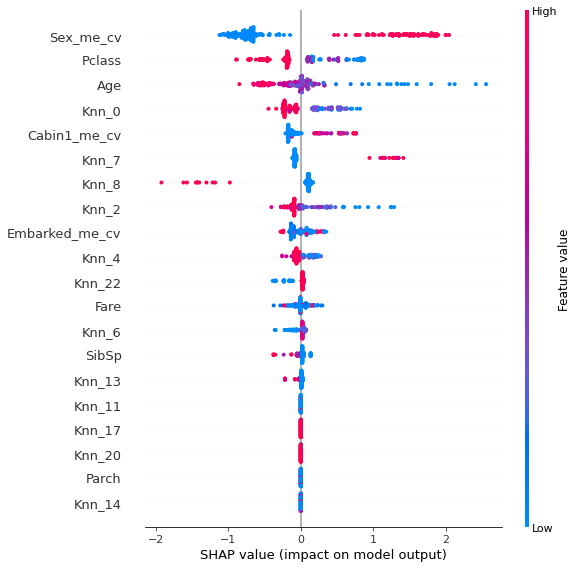

In [57]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values, X_val, (X.columns.tolist()+Knn_feat_names))

##### 4.2.3 Categorize the age, combine it with sex, then mean-encoding it to make a new feature

In [113]:
# try add sex-age mean-encoded feature
X,y = explore[X_cols_keep + ['Sex-Age_me_cv']], explore['Survived']
X_MeanEnc_KnnFeats = np.c_[X.values,knn_feats]

X_train, X_val, y_train, y_val = train_test_split(X_MeanEnc_KnnFeats, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.189944
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.178771
[2]	validation_0-error:0.156425
[3]	validation_0-error:0.178771
[4]	validation_0-error:0.156425
[5]	validation_0-error:0.156425
[6]	validation_0-error:0.156425
Stopping. Best iteration:
[2]	validation_0-error:0.156425



0.8436

*same exact accuracy*

In [106]:
# tune hyper-params
random_tree.fit(X_MeanEnc_KnnFeats, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.8519


{'gamma': 0.5,
 'learning_rate': 0.15193009404253846,
 'max_depth': 3,
 'n_estimators': 213}

In [107]:
random_tree.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
y_val_hat = random_tree.best_estimator_.predict(X_val)
accuracy_score(y_val_hat, y_val).round(4)

[0]	validation_0-error:0.189944
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.156425
[2]	validation_0-error:0.156425
[3]	validation_0-error:0.156425
[4]	validation_0-error:0.162011
[5]	validation_0-error:0.156425
Stopping. Best iteration:
[1]	validation_0-error:0.156425



0.8436

*Actually worse*

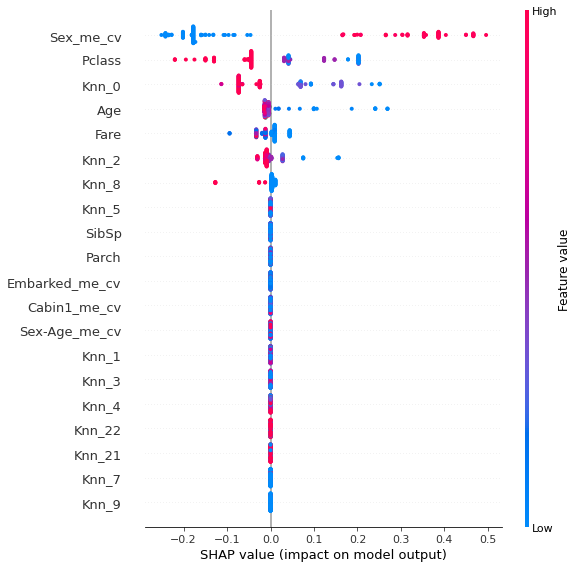

In [108]:
explainer = shap.TreeExplainer(random_tree.best_estimator_, X_train)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, (X.columns.tolist()+Knn_feat_names))

##### 4.2.4 try replace Sex and Age with the combined feature, instead of just adding it

In [115]:
new_X_cols_keep = ['Pclass','SibSp','Parch','Fare','Embarked_me_cv','Cabin1_me_cv','Sex-Age_me_cv']
X,y = explore[new_X_cols_keep], explore['Survived']
X_MeanEnc_KnnFeats = np.c_[X.values,knn_feats]

X_train, X_val, y_train, y_val = train_test_split(X_MeanEnc_KnnFeats, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.189944
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.162011
[2]	validation_0-error:0.162011
[3]	validation_0-error:0.162011
[4]	validation_0-error:0.156425
[5]	validation_0-error:0.156425
[6]	validation_0-error:0.156425
[7]	validation_0-error:0.156425
[8]	validation_0-error:0.156425
Stopping. Best iteration:
[4]	validation_0-error:0.156425



0.8436

In [116]:
# tune hyper-params
random_tree.fit(X_MeanEnc_KnnFeats, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.8384


{'gamma': 0.5,
 'learning_rate': 0.019548228283650902,
 'max_depth': 4,
 'n_estimators': 170}

In [117]:
random_tree.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
y_val_hat = random_tree.best_estimator_.predict(X_val)
accuracy_score(y_val_hat, y_val).round(4)

[0]	validation_0-error:0.150838
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.150838
[2]	validation_0-error:0.150838
[3]	validation_0-error:0.150838
[4]	validation_0-error:0.150838
Stopping. Best iteration:
[0]	validation_0-error:0.150838



0.8492

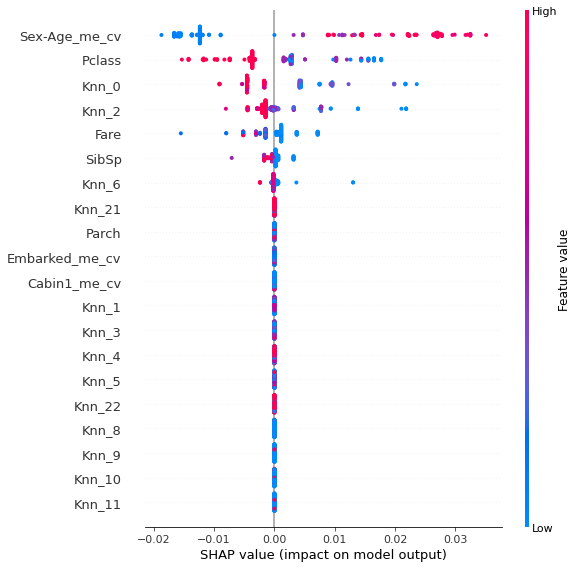

In [118]:
explainer = shap.TreeExplainer(random_tree.best_estimator_, X_train)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, (X.columns.tolist()+Knn_feat_names))

*about the same as keeping the original sex and age, not an improvement over the original*

#### 4.3 Based on feature importance, verify if knn_features could be ignored

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)

accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.206704
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.206704
[2]	validation_0-error:0.206704
[3]	validation_0-error:0.206704
[4]	validation_0-error:0.206704
Stopping. Best iteration:
[0]	validation_0-error:0.206704



0.7933

*Huge drop in accuracy compared to with KNN_feats*

In [89]:
# Try use cv to tune the hyperparameters
random_tree.fit(X, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.8418


{'gamma': 0.5,
 'learning_rate': 0.44991601893405303,
 'max_depth': 4,
 'n_estimators': 31}

In [90]:
# try with non_knn again but with tuned hyperparameters
No_Knn_Model = random_tree.best_estimator_
No_Knn_Model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
y_val_hat = No_Knn_Model.predict(X_val)
accuracy_score(y_val_hat, y_val).round(4)

[0]	validation_0-error:0.156425
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.162011
[2]	validation_0-error:0.162011
[3]	validation_0-error:0.195531
[4]	validation_0-error:0.178771
Stopping. Best iteration:
[0]	validation_0-error:0.156425



0.8436

*not quite at the level with Knn_models, but a huge improvement over untuned version*

In [91]:
# examine feature importance for non_knn model
models = [xgb_clf, No_Knn_Model]
top_n = 8

for model in models:
    top_importance = np.sort(model.feature_importances_)[::-1][:top_n]
    top_indices = np.argsort(model.feature_importances_)[::-1][:top_n]
    top_feats = X.columns[top_indices]
    
    print(model)
    for feat, imp in zip(top_feats, top_importance):
        print(feat, '\t\t', imp)
    print('\n')

XGBClassifier()
Sex_me_cv 		 0.70158535
Pclass 		 0.16693862
Cabin1_me_cv 		 0.053479224
Fare 		 0.051640414
Age 		 0.026356332
Embarked_me_cv 		 0.0
Parch 		 0.0
SibSp 		 0.0


XGBClassifier(gamma=0.5, learning_rate=0.44991601893405303, max_depth=4,
              n_estimators=31)
Sex_me_cv 		 0.5097072
Pclass 		 0.21054873
Cabin1_me_cv 		 0.076343395
SibSp 		 0.06251775
Fare 		 0.050526027
Age 		 0.041677225
Embarked_me_cv 		 0.025944151
Parch 		 0.022735484




#### 4.4 check SHAP

In [ ]:
shap.force_plot

In [133]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values[1], X_val[:,:8])

AssertionError: Summary plots need a matrix of shap_values, not a vector.

# apply model on test set

In [103]:
y_test_hat = random_tree.best_estimator_.predict(X_test_MeanEnc_KnnFeats)

In [117]:
y_test_output = pd.Series(y_test_hat, index=test.index, name = 'Survived')
pd.DataFrame(y_test_output).to_csv('Titanic_3_feat_gen_pred.csv')